# Q2.1

1. Use `matplotlib` to show scatterplots of each variable

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

temp = pd.read_csv("happiness.csv")
data = temp.copy()

for i in range(len(data.loc[:,'inflation_rate[%]'])):
    if data.loc[:,'inflation_rate[%]'].iat[i] > 100:
        data.loc[:,'inflation_rate[%]'].iat[i] = data.loc[:,'inflation_rate[%]'].mean()
        #data.loc[:,'inflation_rate[%]'].iat[i] = data[data.loc[:,'inflation_rate[%]'] > 100].mean() <- error
        
data.drop(columns = ['country', 'happiness_rank', 'map_reference', 'biggest_official_language'])
x = data.loc[:,'happiness_score']

s = 1

plt.subplot(4, 4, 1)
plt.scatter(x, data.loc[:,'economy'], s)
plt.title(data.columns.values[3])

plt.subplot(4, 4, 2)
plt.scatter(x, data.loc[:,'family'], s)
plt.title(data.columns.values[4])

plt.subplot(4, 4, 3)
plt.scatter(x, data.loc[:,'health'], s)
plt.title(data.columns.values[5])

plt.subplot(4, 4, 4)
plt.scatter(x, data.loc[:,'freedom'], s)
plt.title(data.columns.values[6])

plt.subplot(4, 4, 5)
plt.scatter(x, data.loc[:,'generosity'], s)
plt.title(data.columns.values[7])

plt.subplot(4, 4, 6)
plt.scatter(x, data.loc[:,'corruption'], s)
plt.title(data.columns.values[8])

plt.subplot(4, 4, 7)
plt.scatter(x, data.loc[:,'dystopia_residual'], s)
plt.title(data.columns.values[9])

plt.subplot(4, 4, 8)
plt.scatter(x, data.loc[:,'internet_access_population[%]'], s)
plt.title(data.columns.values[10])

plt.subplot(4, 4, 9)
plt.scatter(x, data.loc[:,'cellular_subscriptions'], s)
plt.title(data.columns.values[11])

plt.subplot(4, 4, 10)
plt.scatter(x, data.loc[:,'surplus_deficit_GDP[%]'], s)
plt.ylim(plt.ylim()[0],100)
plt.title(data.columns.values[12])

plt.subplot(4, 4, 11)
plt.scatter(x, data.loc[:,'familiy_income_gini_coeff'], s)
plt.title(data.columns.values[13])

plt.subplot(4, 4, 12)
plt.scatter(x, data.loc[:,'GDP_per_capita[$]'], s)
plt.title(data.columns.values[14])

plt.subplot(4, 4, 13)
plt.scatter(x, data.loc[:,'inflation_rate[%]'], s)
plt.ylim(plt.ylim()[0],100)
plt.title(data.columns.values[15])

plt.subplot(4, 4, 14)
plt.scatter(x, data.loc[:,'military_expenditures[%]'], s)
plt.ylim(plt.ylim()[0],100)
plt.title(data.columns.values[16])

plt.subplot(4, 4, 15)
plt.scatter(x, data.loc[:,'population'], s)
plt.title(data.columns.values[19])

plt.subplots_adjust(top=2, bottom=0, left=0, right=2, hspace=0.35, wspace=0.35)

#np.corrcoef(x, data.loc[:,'population'])

data = data.fillna(5);

#np.corrcoef(data.loc[:,'economy'], data.loc[:,'family'])
np.corrcoef(data.loc[:,'freedom'], data.loc[:,'cellular_subscriptions'])
np.corrcoef([data.loc[:,'freedom'], data.loc[:,'familiy_income_gini_coeff']])
np.corrcoef([x, data.loc[:,'familiy_income_gini_coeff']])


#import scipy.stats as stats
#stats.f_oneway(data.loc[:,'economy'], data.loc[:,'corruption'])


array([[ 1.        , -0.17677668],
       [-0.17677668,  1.        ]])

\begin{enumerate}
    \item economy: positive linear correlation
    \item family: positive linear/quadratic correlation
    \item health: positive linear correlation
    \item freedom: cubic correlation / no correlation
    \item generosity: weak quadratic correlation / no correlation
    \item corruption: cubic correlation / no correlation
    \item dystopia residual: no correlation
    \item internet acces population $\left[ \% \right]$: positive linear correlation / cubic correlation
    \item cellular subscriptions: quadratic correlation
    \item surplus deficit GDP $\left[ \% \right]$: no correlation
    \item family income gini coeff: no correlation / weak negative linear correlation
    \item GDP per capital $\left[ \$ \right]$: quadratic correlation
    \item inflation rate $\left[ \% \right]$: no correlation
    \item military expenditures $\left[ \% \right]$: no correlation
    \item population: no correlation
\end{enumerate}

text about importance

# Q2.2

Load data and set up packages

In [2]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics.pairwise import pairwise_kernels

Check the dataset for missing values and, if any are found, address them programmatically

In [3]:
data.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,corruption,dystopia_residual,internet_access_population[%],cellular_subscriptions,surplus_deficit_GDP[%],familiy_income_gini_coeff,GDP_per_capita[$],inflation_rate[%],military_expenditures[%],map_reference,biggest_official_language,population
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,97.3,108,4.2,26.8,71800.0,1.9,1.62,Europe,Bokmal Norwegian,5320045
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,97.0,124,-0.6,29.0,49900.0,1.1,1.15,Europe,Danish,5605948
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,98.2,121,0.9,28.0,51800.0,1.8,0.10,Arctic Region,Icelandic,339747
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,89.4,137,0.2,29.5,61400.0,0.5,0.71,Europe,German,8236303
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,87.7,132,-2.0,27.2,44300.0,0.8,1.23,Europe,Finnish,5518371


## Linear model

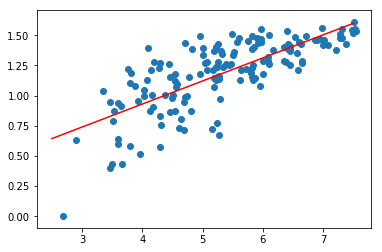

In [4]:

linearModel = LinearRegression();

x_reshaped = np.array(data.happiness_score).reshape(-1,1)
linearModel.fit(x_reshaped, data.family)

reg_x = np.linspace(2.5,7.5, 100).reshape(-1,1)
reg_y = linearModel.predict(reg_x)

plt.scatter(data.happiness_score, data.family)
plt.plot(reg_x, reg_y, c ='red')




{text results here}

## Quadratic model

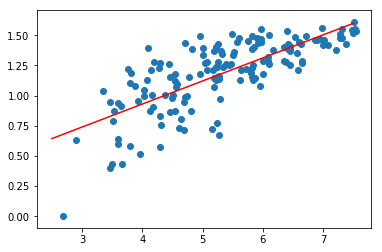

In [5]:

sklearn.metrics.pairwise.polynomial_kernel(x_reshaped, np.array(data.family).reshape(-1,1), degree=3, gamma=None, coef0=1)

reg_x = np.linspace(2.5,7.5, 100).reshape(-1,1)
reg_y = linearModel.predict(reg_x)

plt.scatter(data.happiness_score, data.family)
plt.plot(reg_x, reg_y, c ='red')


{text results here}

## Gaussian model

{text results here}

## Comparison

{replace with your comparison paragraph/images}